# Imports

In [124]:
import os 
import sys
import pandas as pd
import yfinance as yf
import plotly as px

In [142]:
current_dir = os.getcwd()
print(current_dir)

parent_dir = os.path.dirname(current_dir)
print(parent_dir)

sys.path.insert(0,parent_dir)

c:\ML and DS Files\Kifiya AI\Kaim-week-1\notebooks
c:\ML and DS Files\Kifiya AI\Kaim-week-1


In [143]:
from importlib import reload
import scripts.financial_analysis
reload(scripts.financial_analysis)

<module 'scripts.financial_analysis' from 'c:\\ML and DS Files\\Kifiya AI\\Kaim-week-1\\scripts\\financial_analysis.py'>

In [144]:
from scripts.data_loader import DataLoader
from scripts.financial_analysis import FinancialAnalysis, FinancialMetrics, FinancialVisualizer

# 0. Load Data (AMAZON)

In [128]:
file_path = r"C:\ML and DS Files\Kifiya AI\Kaim-week-1\week 1 data\Data\yfinance_data\AMZN_historical_data.csv"
loader = DataLoader(file_path)
data = loader.load_data()

Data successfully loaded from C:\ML and DS Files\Kifiya AI\Kaim-week-1\week 1 data\Data\yfinance_data\AMZN_historical_data.csv


In [129]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0


# 1. Apply Analysis Indicators with TA-Lib

#### 1.1 use TA-Lib to calculate various technical indicators such as moving averages, RSI (Relative Strength Index), and MACD (Moving Average Convergence Divergence)

In [130]:
analysis = FinancialAnalysis(data)

In [131]:
# calculate moving average for the period of 20
data['MA_20'] = analysis.calculate_moving_average(period=20)

In [132]:
# calculate RSI for 14
data['RSI_14'] = analysis.calculate_rsi(period=14)

In [133]:
# calculate Moving Average Convergence Divergence
macd, macd_signal, macd_hist = analysis.calculate_macd()

In [134]:
data.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,MA_20,RSI_14,MACD,MACD_Signal,MACD_Hist
6844,2024-07-29,183.839996,184.750000,182.380005,183.199997,183.199997,33270100,0.0,0.0,190.9320,42.432437,-2.133520,-0.672530,-1.460990
6845,2024-07-30,184.720001,185.860001,179.380005,181.710007,181.710007,39508600,0.0,0.0,190.1575,40.408843,-2.280971,-0.994218,-1.286753


# 2. Use Ta-Lib for Financial Metrics

In [135]:
metrics = FinancialMetrics(data)

In [136]:
# Daily Returns
data['Daily_Returns'] = metrics.calculate_daily_returns()

In [137]:
# Commulative Returns
data['Cumulative_Returns'] = metrics.calculate_cumulative_returns()

In [138]:
#calculate volatility
volatility = metrics.calculate_volatility()
print(volatility)


0.2762453228096148


In [139]:
# calculate sharpe ratio
sharpe_ratio = metrics.calculate_sharpe_ratio(risk_free_rate=0.03)
print(sharpe_ratio)

1.1802789317594573


In [140]:
data.tail(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,MA_20,RSI_14,MACD,MACD_Signal,MACD_Hist,Daily_Returns,Cumulative_Returns
6843,2024-07-26,180.389999,183.190002,180.240005,182.500000,182.500000,29506000,0.0,0.0,191.4345,41.146719,-2.065994,-0.307283,-1.758711,0.014734,1862.823481
6844,2024-07-29,183.839996,184.750000,182.380005,183.199997,183.199997,33270100,0.0,0.0,190.9320,42.432437,-2.133520,-0.672530,-1.460990,0.003836,1869.972362
6845,2024-07-30,184.720001,185.860001,179.380005,181.710007,181.710007,39508600,0.0,0.0,190.1575,40.408843,-2.280971,-0.994218,-1.286753,-0.008133,1854.755492


In [145]:
data.dtypes

Date                   object
Open                  float64
High                  float64
Low                   float64
Close                 float64
Adj Close             float64
Volume                  int64
Dividends             float64
Stock Splits          float64
MA_20                 float64
RSI_14                float64
MACD                  float64
MACD_Signal           float64
MACD_Hist             float64
Daily_Returns         float64
Cumulative_Returns    float64
dtype: object

# 3. Visualization

In [149]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

In [150]:
visualizer = FinancialVisualizer(data)

#### 3.1 Stock Price and 20-Day Moving average

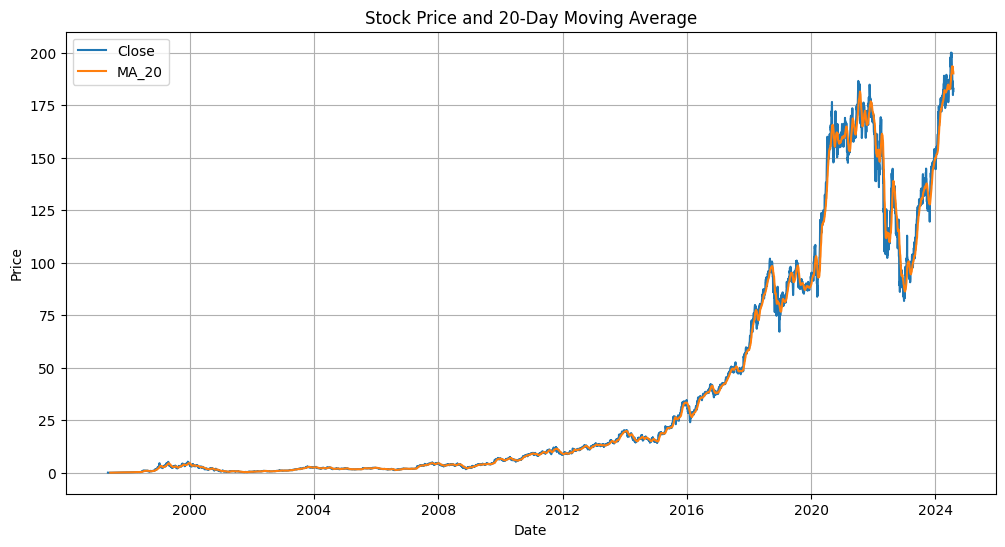

In [151]:
visualizer.plot_price_and_moving_average()

#### 3.2 Relative Strength Index

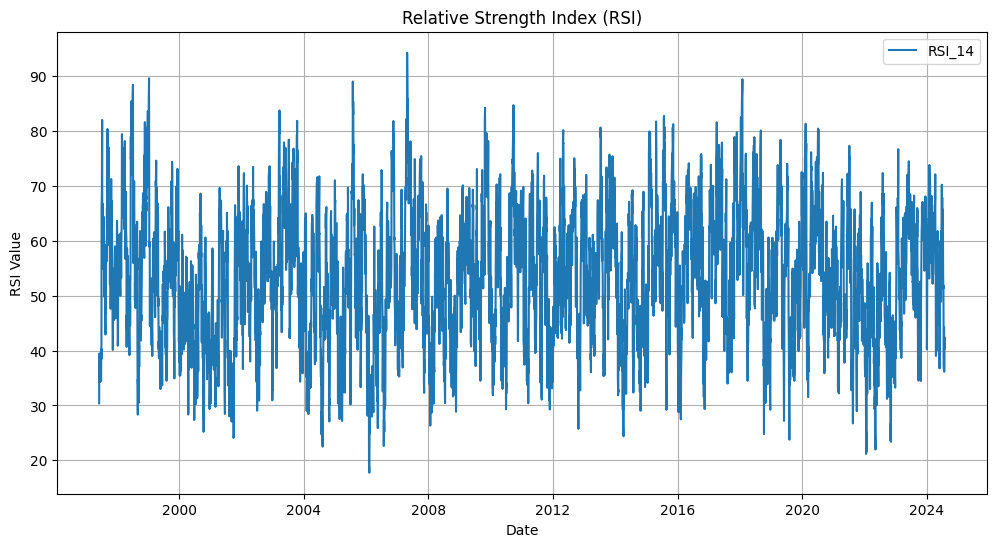

In [152]:
visualizer.plot_rsi()

#### 3.3 Plot the MACD and its signal and histogram

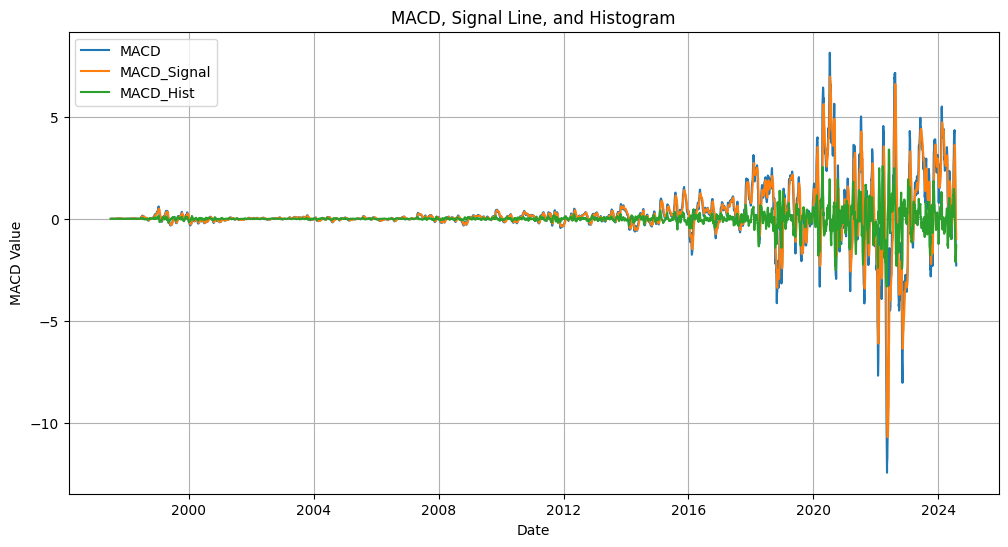

In [153]:
visualizer.plot_macd()


#### 3.4 Daily and comulative returns

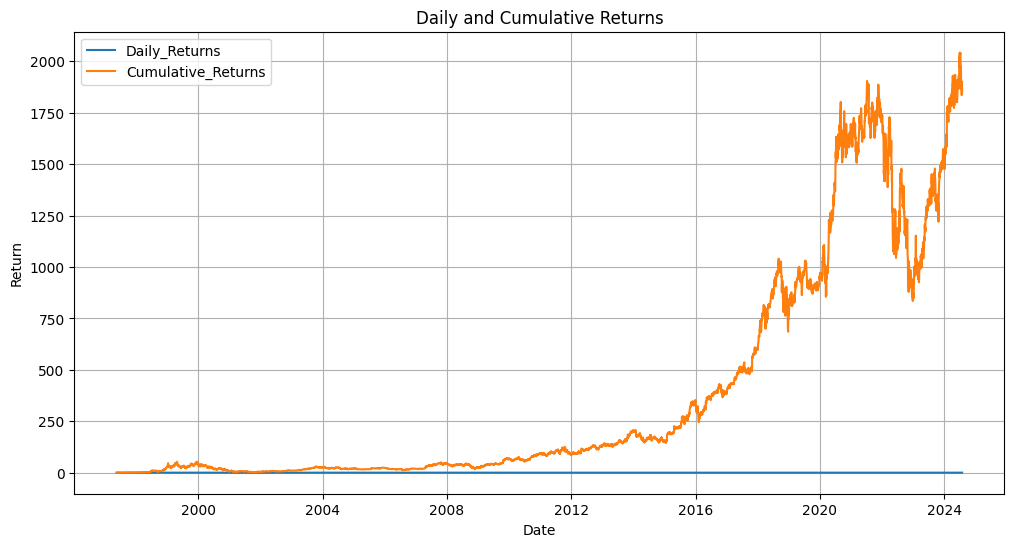

In [154]:
visualizer.plot_returns()

#### 3.5 Custom plot example on Volume column

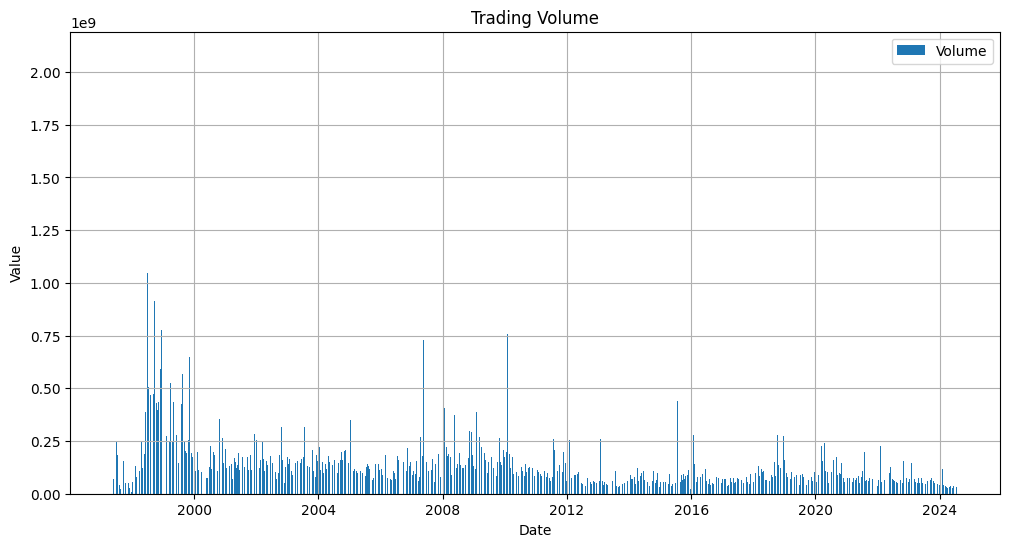

In [155]:

visualizer.plot_custom(columns=['Volume'], kind='bar', title='Trading Volume')